# Ejemplo de DBSCAN


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Generamos un dataset de moons (genera semicírculos intercalados)

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

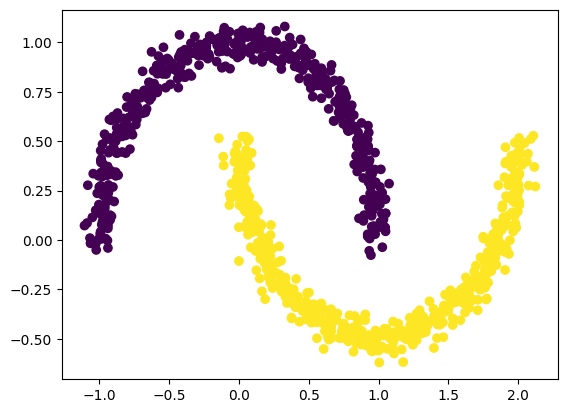

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)

importamos la librería de sklearn

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [25]:
#las etiquetas asignadas en cada instancias estan guardadas en
print(len(dbscan.labels_))
dbscan.labels_[:6]

1000


array([ 0,  2, -1, -1,  1,  0])

In [26]:
#las instancias cores las podemos encontrar en:
print(len(dbscan.core_sample_indices_))
dbscan.core_sample_indices_[:6]

808


array([0, 4, 5, 6, 7, 8])

In [27]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

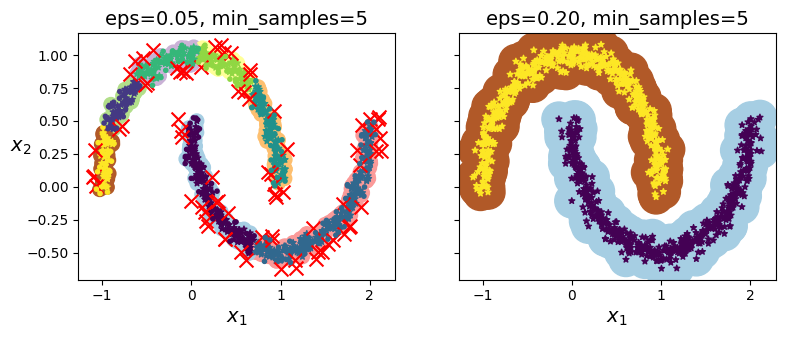

In [28]:
dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(X)


#comparamos hiperparámetros
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

DBSCAN no tiene implementado el método `predict()` porque está pensado para ser un algoritmo puramente de clusterización. Aunque se podría impletando usando KNN.

In [ ]:
dbscan = dbscan2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_]) #uso los puntos core solamente.

KNeighborsClassifier(n_neighbors=50)


Ahora si es posible utilizar predecir a que clúster podrían pertenecer los nuevas instancias.


In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)


array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

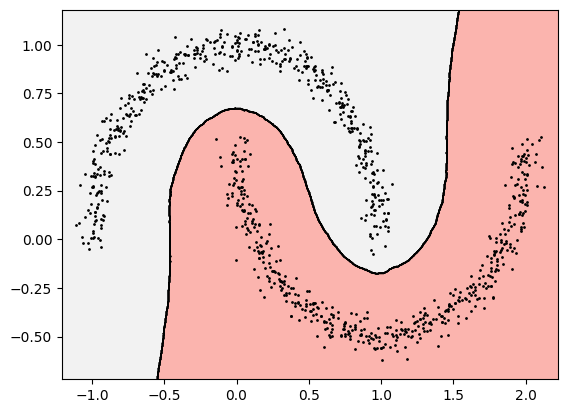

In [ ]:
mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                      np.linspace(mins[1], maxs[1], 1000))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
            cmap="Pastel1")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
            linewidths=1, colors='k')
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)